In [27]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score

import warnings
warnings.filterwarnings('ignore')

import numpy as np

In [2]:
def missing_zero_values_table(df):
#         zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

In [3]:
df_raw = pd.read_csv("cd_data_July_2021.csv")
print (df_raw.shape)
df_raw.head()

(10000, 53)


,_d_diff_ref_rend_provider,_d_more_than_one_cpt_per_claim_per_day,admission_date,age_of_patient_at_service,benefits_assignment_certification_indicator,billing_provider,billing_provider_city,billing_provider_postal_code,claim_creation_date,claim_filing_indicator_code,claim_frequency_type_code,claim_level_charge_amount,claim_submitter_id,clia_number,condition_code,days_to_claim_submission,diagnosis_count,discharge_date,drug_code_category,drug_quantity,facility_code_value,line_item_charge_amount,line_item_id,modifiers_count,ordering_provider,other_insured_group,other_payer1,other_payer2,other_subscriber1_prsn,other_subscriber2_prsn,pat_MRN,pat_relationship_wt_insured,patient_Gender,patient_PostalCode,patient_StateProvinceCode,patient_city,payer_city,payer_name,payer_postal_code,payer_state_province_code,principalDx_CCSR_Category1,prior_authorization_number,proc_hcpcs_category,procedure_modifier,referring_provider,related_causes_code,rendering_provider,service_date,service_unit_quantity,subscriber_policy_type,subscriber_prsn,supervising_provider,denialFlag
0,0,0,NaN,52.0,Y,billing_provider_0,city_92,postal_code_1050,2018-11-30,MC,1,77.68,6423,14356,NaN,5,1,NaN,Vaccine_Viral_-Influenza_A_and_B,1.0,11,44.6,6423_1,0,ordering_provider_5,NaN,NaN,NaN,NaN,NaN,11412.0,NaN,F,postal_code_765,state_15,city_92,city_16,payer_80,postal_code_98,state_15,FAC016,NaN,immunization_administration_for_vaccines/toxoids,NaN,referring_provider_4,NaN,rendering_provider_4,2018-11-25,1,NaN,P,NaN,1
1,0,0,NaN,29.0,Y,billing_provider_1,city_92,postal_code_638,2019-05-15,MC,1,382.30,17247,14356,NaN,102,4,NaN,NaN,NaN,22,133.2,17247_2,0,ordering_provider_12,NaN,NaN,NaN,NaN,NaN,13292.0,NaN,M,postal_code_1509,state_15,city_65,city_16,payer_3,postal_code_98,state_15,GEN002,NaN,Hospital_observation_services,NaN,referring_provider_4,NaN,rendering_provider_4,2019-02-03,1,NaN,P,NaN,1
2,0,0,NaN,79.0,Y,billing_provider_0,city_92,postal_code_1050,2018-07-26,MB,1,187.00,14405,14356,NaN,2,1,NaN,NaN,NaN,11,187.0,14405_1,0,ordering_provider_10,NaN,payer_53,NaN,S,NaN,13356.0,NaN,M,postal_code_407,state_15,city_71,city_41,payer_31,postal_code_54,state_1,DIG010,NaN,Office/other_outpatient_services,NaN,referring_provider_9,NaN,rendering_provider_9,2018-07-24,1,NaN,P,NaN,1
3,0,0,NaN,18.0,Y,billing_provider_0,city_92,postal_code_1412,2019-06-12,MC,1,115.00,20401,14356,NaN,3,1,NaN,NaN,NaN,11,115.0,20401_1,0,ordering_provider_5,NaN,NaN,NaN,NaN,NaN,11407.0,NaN,M,postal_code_1132,state_15,city_92,city_16,payer_3,postal_code_98,state_15,INJ041,NaN,Office/other_outpatient_services,NaN,referring_provider_4,NaN,rendering_provider_4,2019-06-09,1,NaN,P,NaN,1
4,0,0,NaN,81.0,Y,billing_provider_0,city_92,postal_code_1050,2018-02-07,MB,1,91.80,7157,14356,NaN,13,2,NaN,NaN,NaN,11,91.8,7157_1,0,ordering_provider_4,NaN,NaN,NaN,NaN,NaN,13946.0,NaN,F,postal_code_406,state_15,city_92,city_41,payer_31,postal_code_54,state_1,FAC008,NaN,Office/other_outpatient_services,NaN,referring_provider_3,NaN,rendering_provider_3,2018-01-25,1,NaN,P,NaN,1


### Explicit type conversion

In [4]:
intTypeList =["age_of_patient_at_service",
#                 "claim_level_charge_amount",
                "days_to_claim_submission",
                "diagnosis_count",
                "drug_quantity",
                "line_item_charge_amount",
                "modifiers_count",
                "service_unit_quantity", 
              "claim_level_charge_amount"]

# floatTypeList = [ "claim_level_charge_amount"]


strTypeList = ["billing_provider",
                "billing_provider_city",
                "billing_provider_postal_code",
                "claim_submitter_id",
                "clia_number",
                "line_item_id",
                "ordering_provider",
                "pat_MRN",
                "patient_StateProvinceCode",
                "patient_city",
                "payer_city",
                "payer_name",
                "payer_postal_code",
                "payer_state_province_code",
                "prior_authorization_number",
                "referring_provider",
                "rendering_provider",
                "supervising_provider",
                "_d_diff_ref_rend_provider",
                "_d_more_than_one_cpt_per_claim_per_day",
                "benefits_assignment_certification_indicator",
                "claim_filing_indicator_code",
                "claim_frequency_type_code",
                "condition_code",
                "drug_code_category",
                "facility_code_value",
                "other_insured_group",
                "other_payer1",
                "other_payer2",
                "other_subscriber1_prsn",
                "other_subscriber2_prsn",
                "pat_relationship_wt_insured",
                "patient_Gender",
                "patient_PostalCode",
                "principalDx_CCSR_Category1",
                "proc_hcpcs_category",
                "procedure_modifier",
                "related_causes_code",
                "subscriber_policy_type",
                "subscriber_prsn",
                "denialFlag"
                ]

dataTypeList = ["admission_date",
                "claim_creation_date",
                "discharge_date",
                "service_date"]

print (len(intTypeList) +  len(strTypeList) + len(dataTypeList))
print (df_raw.shape)

# print (len(intTypeList) +  len(strTypeList) + len(dataTypeList))
# print (df_raw.shape)

df_raw[intTypeList] = df_raw[intTypeList].apply(pd.to_numeric, errors='coerce')
df_raw[strTypeList] = df_raw[strTypeList].astype(object)

for i in range(len(dataTypeList)):
    df_raw[dataTypeList[i]] = pd.to_datetime(df_raw[dataTypeList[i]], format="%Y-%m-%d")


53
(10000, 53)


#### Droping the missing columns that having more or equal to 75% 


In [26]:
# Delete columns containing either 80% or more than 80% NaN Values
perc = 75
min_count =  int(((100-perc)/100)*df_raw.shape[0] + 1)
mod_df = df_raw.dropna( axis=1, thresh=min_count)
print (df_raw.shape)
mod_df.shape


(10000, 53)


(10000, 39)

In [6]:
# Integer Columns

temp = list(set(intTypeList).difference(set(mod_df.columns.tolist())))
print ("columns removed = ", temp)
for i in range(len(temp)):
    intTypeList.remove(temp[i])
    
int_df = mod_df[intTypeList]

print (int_df.shape)

# https://integrisok.com/resources/on-your-health/2015/october/stages-of-life-health-for-every-age
int_df["age_of_patient_Group_customize"] = pd.cut(int_df["age_of_patient_at_service"],\
                 [-1, 1, 4, 12, 19, 39, 59, np.inf],\
                 labels=['Infant', 'Toddler', 'Child', 'Teen', 'Adult', 'Middle Age Adult', 'Senior Adult'])

print (int_df.shape)
int_df.head()



columns removed =  ['drug_quantity']
(10000, 7)
(10000, 8)


<ipython-input-6-899de7a4c89c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_df["age_of_patient_Group_customize"] = pd.cut(int_df["age_of_patient_at_service"],\


,age_of_patient_at_service,days_to_claim_submission,diagnosis_count,line_item_charge_amount,modifiers_count,service_unit_quantity,claim_level_charge_amount,age_of_patient_Group_customize
0,52.0,5,1,44.6,0,1,77.68,Middle Age Adult
1,29.0,102,4,133.2,0,1,382.30,Adult
2,79.0,2,1,187.0,0,1,187.00,Senior Adult
3,18.0,3,1,115.0,0,1,115.00,Teen
4,81.0,13,2,91.8,0,1,91.80,Senior Adult


In [7]:
# dates Columns

temp = list(set(dataTypeList).difference(set(mod_df.columns.tolist())))
print ("columns removed = ",temp)
for i in range(len(temp)):
    dataTypeList.remove(temp[i])
    
dates_df =  mod_df[dataTypeList]

dates_df["serviceToClaimDays"] = (dates_df['claim_creation_date'] - dates_df['service_date']).dt.days

# Assumption

temp = dates_df[dates_df["serviceToClaimDays"] > 365]
print (temp.shape)
print (temp["serviceToClaimDays"].min())
print (temp["serviceToClaimDays"].max())

print (dates_df.shape)
dates_df.head()

columns removed =  ['discharge_date', 'admission_date']
(203, 3)
366
1495
(10000, 3)


<ipython-input-7-e4b499362ee8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates_df["serviceToClaimDays"] = (dates_df['claim_creation_date'] - dates_df['service_date']).dt.days


,claim_creation_date,service_date,serviceToClaimDays
0,2018-11-30,2018-11-25,5
1,2019-05-15,2019-02-03,101
2,2018-07-26,2018-07-24,2
3,2019-06-12,2019-06-09,3
4,2018-02-07,2018-01-25,13


In [8]:
# Categorical Columns


temp = list(set(strTypeList).difference(set(mod_df.columns.tolist())))
print ("columns removed = ",temp)
for i in range(len(temp)):
    strTypeList.remove(temp[i])
    
    
str_df =  mod_df[strTypeList]

# drop the columns that are not selected for modeling
columns_drop_list = ["billing_provider_city", "claim_submitter_id", "clia_number", "line_item_id", "pat_MRN"]
#                      "other_payer2" ]

# print (str_df.shape)

str_df.drop(columns_drop_list, inplace = True, axis = 1)
print (str_df.shape)

missing_zero_values_table(str_df)

#fill the missing value with "Unknown"
str_df = str_df.fillna(value="Unknown")
print (str_df.shape)
str_df.head()

columns removed =  ['drug_code_category', 'other_payer2', 'other_insured_group', 'other_subscriber2_prsn', 'subscriber_policy_type', 'pat_relationship_wt_insured', 'procedure_modifier', 'supervising_provider', 'related_causes_code', 'condition_code', 'prior_authorization_number']
(10000, 25)
Your selected dataframe has 25 columns and 10000 Rows.
There are 5 columns that have missing values.
(10000, 25)


C:\Rahul\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,billing_provider,billing_provider_postal_code,ordering_provider,patient_StateProvinceCode,patient_city,payer_city,payer_name,payer_postal_code,payer_state_province_code,referring_provider,rendering_provider,_d_diff_ref_rend_provider,_d_more_than_one_cpt_per_claim_per_day,benefits_assignment_certification_indicator,claim_filing_indicator_code,claim_frequency_type_code,facility_code_value,other_payer1,other_subscriber1_prsn,patient_Gender,patient_PostalCode,principalDx_CCSR_Category1,proc_hcpcs_category,subscriber_prsn,denialFlag
0,billing_provider_0,postal_code_1050,ordering_provider_5,state_15,city_92,city_16,payer_80,postal_code_98,state_15,referring_provider_4,rendering_provider_4,0,0,Y,MC,1,11,Unknown,Unknown,F,postal_code_765,FAC016,immunization_administration_for_vaccines/toxoids,P,1
1,billing_provider_1,postal_code_638,ordering_provider_12,state_15,city_65,city_16,payer_3,postal_code_98,state_15,referring_provider_4,rendering_provider_4,0,0,Y,MC,1,22,Unknown,Unknown,M,postal_code_1509,GEN002,Hospital_observation_services,P,1
2,billing_provider_0,postal_code_1050,ordering_provider_10,state_15,city_71,city_41,payer_31,postal_code_54,state_1,referring_provider_9,rendering_provider_9,0,0,Y,MB,1,11,payer_53,S,M,postal_code_407,DIG010,Office/other_outpatient_services,P,1
3,billing_provider_0,postal_code_1412,ordering_provider_5,state_15,city_92,city_16,payer_3,postal_code_98,state_15,referring_provider_4,rendering_provider_4,0,0,Y,MC,1,11,Unknown,Unknown,M,postal_code_1132,INJ041,Office/other_outpatient_services,P,1
4,billing_provider_0,postal_code_1050,ordering_provider_4,state_15,city_92,city_41,payer_31,postal_code_54,state_1,referring_provider_3,rendering_provider_3,0,0,Y,MB,1,11,Unknown,Unknown,F,postal_code_406,FAC008,Office/other_outpatient_services,P,1


### one hot encoding

In [9]:
colNames = list(str_df.columns)
# colNames

tempDummy= pd.DataFrame()
for i in range(len(colNames)):
    if colNames[i] == "denialFlag":
        continue
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    sparse_data = pd.DataFrame (encoder.fit_transform(str_df[[colNames[i]]]))
    sparse_data.columns = encoder.get_feature_names([colNames[i]])
    
    if (tempDummy.shape[0] == 0):
        tempDummy = sparse_data.copy(deep = True)
    else:
        tempDummy = pd.concat([tempDummy, sparse_data], axis = 1)

        

tempDummy.shape

(10000, 2021)

### combine all the dataset

In [10]:
final_data = pd.concat([int_df, dates_df, tempDummy], axis = 1)


# one hot endoing for the "age_of_patient_Group_customize"
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
age_sparse_data = pd.DataFrame (encoder.fit_transform(final_data[["age_of_patient_Group_customize"]]))
age_sparse_data.columns = encoder.get_feature_names(["age_of_patient_Group"])

final_data = pd.concat([final_data, age_sparse_data, df_raw["denialFlag"]], axis = 1)
final_data.drop(["age_of_patient_Group_customize", "claim_creation_date", "service_date"], axis = 1, inplace = True)

final_data["denialFlag"] = final_data["denialFlag"].astype(int)
print (final_data.shape)
final_data.head()

(10000, 2037)


age_of_patient_at_service  days_to_claim_submission  diagnosis_count  \
0                       52.0                         5                1   
1                       29.0                       102                4   
2                       79.0                         2                1   
3                       18.0                         3                1   
4                       81.0                        13                2   

   line_item_charge_amount  modifiers_count  service_unit_quantity  \
0                     44.6                0                      1   
1                    133.2                0                      1   
2                    187.0                0                      1   
3                    115.0                0                      1   
4                     91.8                0                      1   

   claim_level_charge_amount  serviceToClaimDays  \
0                      77.68                   5   
1                     382.30                 101   
2                     187.00                   2   
3                     115.00                   3   
4                      91.80                  13   

   billing_provider_billing_provider_0  billing_provider_billing_provider_1  \
0                                  1.0                                  0.0   
1                                  0.0                                  1.0   
2                                  1.0                                  0.0   
3                                  1.0                                  0.0   
4                                  1.0                                  0.0   

   billing_provider_billing_provider_2  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   

   billing_provider_postal_code_postal_code_1050  \
0                                            1.0   
1                                            0.0   
2                                            1.0   
3                                            0.0   
4                                            1.0   

   billing_provider_postal_code_postal_code_1412  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            1.0   
4                                            0.0   

   billing_provider_postal_code_postal_code_243  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   billing_provider_postal_code_postal_code_638  ordering_provider_Unknown  \
0                                           0.0                        0.0   
1                                           1.0                        0.0   
2                                           0.0                        0.0   
3                                           0.0                        0.0   
4                                           0.0                        0.0   

   ordering_provider_ordering_provider_0  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   ordering_provider_ordering_provider_1  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   ordering_provider_ordering_provider_10  \
0                                     0.0   
1                                     0.0   
2                      

In [11]:
# Frequency of the denialFlag
final_data["denialFlag"].value_counts()/len(final_data) *100

0    70.0
1    30.0
Name: denialFlag, dtype: float64

### Create Train, Test and Validation Data set

In [12]:
final_data_0 = final_data[final_data["denialFlag"]==0]
final_data_1 = final_data[final_data["denialFlag"]==1]

In [13]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split( final_data_0.loc[:, ~final_data_0.columns.isin(['denialFlag'])],\
                                                    final_data_0["denialFlag"], test_size=0.30, random_state=42)

# print (X_train_0.shape[0] )
# print (X_test_0.shape[0] )

# print (X_train_0.shape[0] + X_test_0.shape[0])
# print (y_train_0.shape[0] + y_test_0.shape[0])

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split( final_data_1.loc[:, ~final_data_1.columns.isin(['denialFlag'])],\
                                                    final_data_1["denialFlag"], test_size=0.10, random_state=42)
# print (X_train_1.shape[0] )
# print (X_test_1.shape[0] )

# print (X_train_1.shape[0] + X_test_1.shape[0])
# print (y_train_1.shape[0] + y_test_1.shape[0])


# Test and Validation data set
X_test_0, X_val_0, y_test_0, y_val_0 = train_test_split( X_test_0, y_test_0, test_size=0.10, random_state=42)
# print (X_val_0.shape[0])
# print (X_test_0.shape[0])
# print (X_val_0.shape[0] + X_test_0.shape[0])

##############################
X_test_1, X_val_1, y_test_1, y_val_1 = train_test_split( X_test_1, y_test_1, test_size=0.10, random_state=42)
# print (X_val_1.shape[0])
# print (X_test_1.shape[0])
# print (X_val_1.shape[0] + X_test_1.shape[0])

trainData_0 = pd.concat([X_train_0, y_train_0], axis = 1)
trainData_1 = pd.concat([X_train_1, y_train_1], axis = 1)
trainData = pd.concat([trainData_0, trainData_1], axis = 0)
# trainData.shape

testData_0 = pd.concat([X_test_0, y_test_0], axis = 1)
testData_1 = pd.concat([X_test_1, y_test_1], axis = 1)
testData = pd.concat([testData_0, testData_1], axis = 0)
# testData.shape


valData_0 = pd.concat([X_val_0, y_val_0], axis = 1)
valData_1 = pd.concat([X_val_1, y_val_1], axis = 1)
valData = pd.concat([valData_0, valData_1], axis = 0)
# valData.shape

trainData.shape[0] + testData.shape[0] + valData.shape[0]

10000

In [14]:
print ("train dataset shape is ", trainData.shape)
print ("test dataset shape is ", testData.shape)
print ("val dataset shape is ", valData.shape)

train dataset shape is  (7600, 2037)
test dataset shape is  (2160, 2037)
val dataset shape is  (240, 2037)


In [15]:
# Trainf set "denialFlag" frequency
trainData["denialFlag"].value_counts()/len(trainData) *100

0    64.473684
1    35.526316
Name: denialFlag, dtype: float64

In [16]:
# model = RandomForestClassifier(n_estimators=100)

model = RandomForestClassifier(n_estimators= 1000, oob_score = True, n_jobs = -1,random_state = 50,
                               max_features = "auto", min_samples_leaf = 50)

model.fit(trainData.drop(['denialFlag'], axis = 1), trainData['denialFlag'])
len(model.feature_importances_)

2036

In [17]:
# Extract feature importances
fi = pd.DataFrame({'feature': list(trainData.drop(['denialFlag'], axis = 1).columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display top 15 features importance
fi.head(15)

,feature,importance
1,days_to_claim_submission,0.121813
7,serviceToClaimDays,0.082361
6,claim_level_charge_amount,0.040679
0,age_of_patient_at_service,0.033925
3,line_item_charge_amount,0.029660
2,diagnosis_count,0.021831
393,patient_Gender_F,0.008975
127,patient_city_city_92,0.008891
394,patient_Gender_M,0.008684
1972,proc_hcpcs_category_Office/other_outpatient_se...,0.007726


<AxesSubplot:>

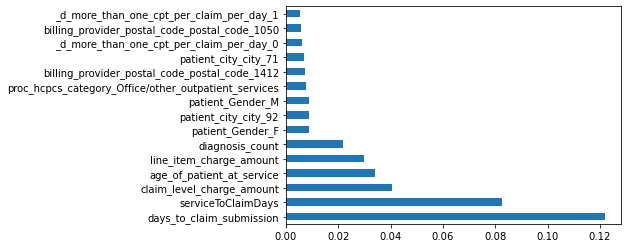

In [18]:
feat_importances = pd.Series(model.feature_importances_, index=trainData.drop(['denialFlag'], axis = 1).columns)
feat_importances.nlargest(15).plot(kind='barh')

In [19]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value
        
    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

In [20]:
### Validation of the model

In [21]:
# Add prediction probability to dataframe
# https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python#:~:text=Python%20code%3A&text=The%20optimal%20cut%20off%20point%20is%200.317628%2C%20so%20anything%20above,zero%20in%20the%20current%20example.
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


data = trainData.copy()
rf_probs_list = model.predict_proba(data.drop(['denialFlag'], axis = 1))

rf_probs = rf_probs_list[:, 1]


fpr, tpr, thresholds =roc_curve(data['denialFlag'], rf_probs)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

threshold = Find_Optimal_Cutoff(data['denialFlag'], rf_probs)
print (threshold)

##########
data["pred_proba"] = rf_probs
data['pred'] = [1 if x > threshold[0] else 0 for x in data['pred_proba']]


# evaluate predictions
accuracy = accuracy_score(data["denialFlag"], data["pred"])
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(precision_score(data["denialFlag"], data["pred"], average="macro"))
print(recall_score(data["denialFlag"], data["pred"], average="macro")) 
print(f1_score(data["denialFlag"], data["pred"], average="macro"))

# Print confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(data['denialFlag'], data['pred'])


Area under the ROC curve : 0.999996
[0.51]
Accuracy: 99.97%
0.9997127739984883
0.9997127739984883
0.9997127739984883


array([[4899,    1],
       [   1, 2699]], dtype=int64)

### Test dataset

In [28]:
# Add prediction probability to dataframe
# https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python#:~:text=Python%20code%3A&text=The%20optimal%20cut%20off%20point%20is%200.317628%2C%20so%20anything%20above,zero%20in%20the%20current%20example.
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


data = testData.copy()
rf_probs_list = model.predict_proba(data.drop(['denialFlag'], axis = 1))

rf_probs = rf_probs_list[:, 1]


fpr, tpr, thresholds =roc_curve(data['denialFlag'], rf_probs)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

threshold = Find_Optimal_Cutoff(data['denialFlag'], rf_probs)
print (threshold)

##########
data["pred_proba"] = rf_probs
data['pred'] = [1 if x > threshold[0] else 0 for x in data['pred_proba']]


# evaluate predictions
accuracy = accuracy_score(data["denialFlag"], data["pred"])
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print("precision_score = ", precision_score(data["denialFlag"], data["pred"], average="micro"))
print("recall_score", recall_score(data["denialFlag"], data["pred"], average="micro")) 
print("f1_score", f1_score(data["denialFlag"], data["pred"], average="micro"))

# Print confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(data['denialFlag'], data['pred'])

print ("cohen_kappa_score = ", cohen_kappa_score(data["denialFlag"], data["pred"]))


Area under the ROC curve : 0.933034
[0.35]
Accuracy: 87.04%
precision_score =  0.8703703703703703
recall_score 0.8703703703703703
f1_score 0.8703703703703703
cohen_kappa_score =  0.5534290271132376


In [23]:
cohen_kappa_score(data["denialFlag"], data["pred"])


0.5534290271132376

0.9330344895159709


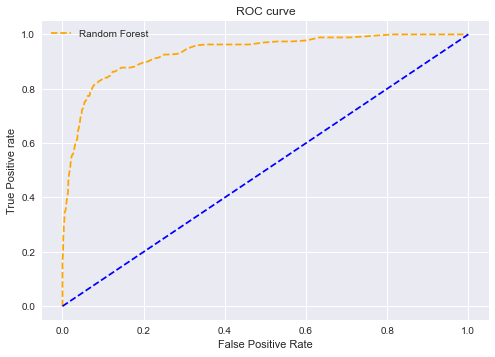

In [24]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(data["denialFlag"], rf_probs, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(data["denialFlag"]))]
p_fpr, p_tpr, _ = roc_curve(data["denialFlag"], random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(data["denialFlag"], rf_probs)

print(auc_score1)


import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Validation dataset

In [29]:
# Add prediction probability to dataframe
# https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python#:~:text=Python%20code%3A&text=The%20optimal%20cut%20off%20point%20is%200.317628%2C%20so%20anything%20above,zero%20in%20the%20current%20example.
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


data = valData.copy()
rf_probs_list = model.predict_proba(data.drop(['denialFlag'], axis = 1))

rf_probs = rf_probs_list[:, 1]


fpr, tpr, thresholds =roc_curve(data['denialFlag'], rf_probs)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

# threshold = Find_Optimal_Cutoff(data['denialFlag'], rf_probs)
print (threshold)

##########
data["pred_proba"] = rf_probs
data['pred'] = [1 if x > threshold[0] else 0 for x in data['pred_proba']]


# evaluate predictions
accuracy = accuracy_score(data["denialFlag"], data["pred"])
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print("precision_score = ", precision_score(data["denialFlag"], data["pred"], average="micro"))
print("recall_score", recall_score(data["denialFlag"], data["pred"], average="micro")) 
print("f1_score", f1_score(data["denialFlag"], data["pred"], average="micro"))

# Print confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(data['denialFlag'], data['pred'])

print ("cohen_kappa_score = ", cohen_kappa_score(data["denialFlag"], data["pred"]))


Area under the ROC curve : 0.881270
[0.35]
Accuracy: 84.17%
precision_score =  0.8416666666666667
recall_score 0.8416666666666667
f1_score 0.8416666666666667
cohen_kappa_score =  0.4492753623188406


0.8812698412698413


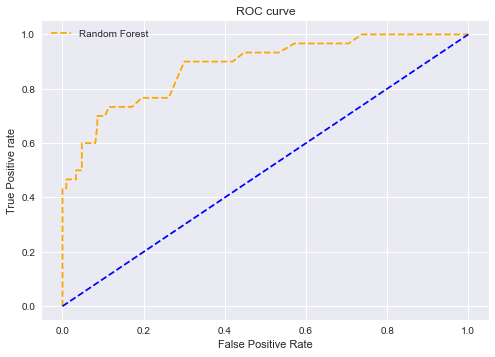

In [30]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(data["denialFlag"], rf_probs, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(data["denialFlag"]))]
p_fpr, p_tpr, _ = roc_curve(data["denialFlag"], random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(data["denialFlag"], rf_probs)

print(auc_score1)


import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();